In [2]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
#Data sources https://www.kaggle.com/datasets/ucimachinelearning/photoplethysmography-ppg-dataset/data
PPG_Raw=pd.read_csv("Data/PPG.csv")
PPG_Raw

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Label
0,-0.015552,0.016963,0.013575,0.027204,0.068154,0.129259,0.127915,0.345174,0.197811,0.167651,...,-0.426464,-0.346976,-0.132168,-0.252098,-0.241969,-0.134235,-0.091327,-0.081713,-0.057693,MI
1,0.002323,0.002754,0.022539,0.228807,0.107751,0.034439,0.086007,0.155667,0.163327,0.223759,...,-0.169345,-0.356808,-0.338996,-0.292489,-0.152872,-0.156076,-0.103265,-0.041579,-0.044272,MI
2,0.050481,-0.339781,0.265111,0.045092,0.040086,0.087173,0.092814,0.099586,-0.143305,0.164186,...,-0.401426,-0.402333,-0.373426,-0.303710,0.008599,-0.180633,-0.143135,-0.084758,0.060668,MI
3,0.023882,0.016561,0.248547,0.054567,0.128032,0.085954,0.107359,0.207137,0.174547,-0.100118,...,-0.390700,-0.353882,-0.294014,-0.267005,-0.242258,-0.186946,-0.173718,0.101331,0.063555,MI
4,-0.058591,0.171551,0.057262,0.270869,0.138357,0.078509,0.062504,0.104447,0.134795,0.194248,...,-0.391598,-0.334490,-0.326873,-0.249881,-0.210052,-0.194763,-0.415365,0.015432,0.010321,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,-0.324640,-0.002758,0.032419,0.064355,0.058884,0.084295,0.113157,0.099573,0.161287,0.182989,...,-0.457989,-0.355685,-0.107379,-0.229693,-0.177197,-0.203492,-0.128723,-0.024295,-0.045567,MI
2572,0.237585,0.061030,0.072820,0.031893,0.114808,0.062936,0.307315,0.126924,0.392320,0.195136,...,-0.437642,-0.321945,-0.303451,-0.197557,-0.229486,-0.134217,-0.119387,-0.000022,-0.027357,MI
2573,0.016238,0.042248,0.042416,0.056881,0.058588,0.108145,0.095167,0.126091,0.163083,0.153061,...,-0.250780,-0.158280,-0.141116,-0.155825,-0.117786,-0.063283,-0.056181,-0.053293,0.007894,Normal
2574,0.002446,0.052906,0.050302,0.066125,0.052302,0.058444,0.048659,0.131709,0.129861,0.172007,...,-0.437347,-0.297214,-0.312739,-0.241026,-0.204217,-0.147206,-0.052625,-0.054537,0.006880,MI


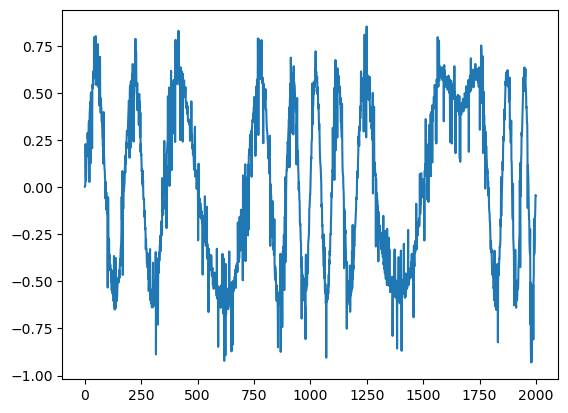

In [3]:
x = list(range(0,2000))  # X-axis points
y = PPG_Raw.iloc[1,0:2000]# Y-axis points
plt.plot(x, y)  # Plot the chart
plt.show()  # display

In [4]:
import numpy as np
from scipy.signal import butter,filtfilt
# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [5]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [8]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(PPG_Raw.iloc[1,0:2000], cutoff, fs, order)
y


array([0.00221032965836449, 0.028047363361620285, 0.05272855939935972,
       ..., -0.11219816006148056, -0.0717612868954276,
       -0.0329766931672686], dtype=object)

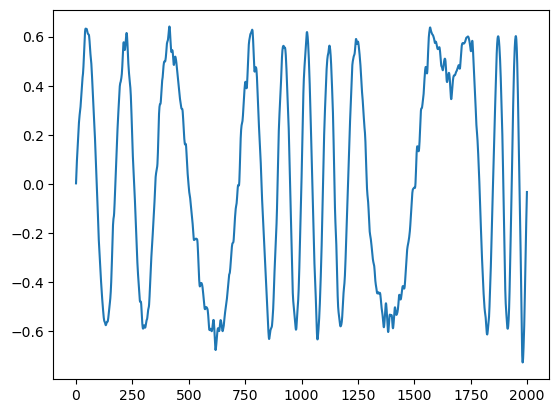

In [9]:
x = list(range(0,2000))  # X-axis points
y = y# Y-axis points
plt.plot(x, y)  # Plot the chart
plt.show()  # display

In [12]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
            y = PPG_Raw.iloc[0,0:2000],
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

In [ ]:
#Home work: Clear All Waves and optional: using AI for MI event prediction!